# Exploratory Analysis over 120 years of Olympic History

## Dataset Details

In this task, you will work on 120 years of Olympic History dataset. Specifically, you will work on athlete_events.csv file from kaggle repository (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The file athlete_events.csv contains 271.116 rows and 15 columns. This dataset begins with the 1896 Athens, Greece Olympics, and runs up to the 2016 Rio, Brazil Olympic Games. Each row corresponds to an athlete competing in an individual Olympic event. The columns of the data-set are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

## Required Python Packages

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Olympic History dataset into a Pandas data frame with the name df_Olympic. 
For this code to work, the file 'athlete_events.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

#Task: Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task: Details of df_olympics data frame are: \n", df_olympics.describe()) 

#Task: Find the number of rows and columns in the df_olympics data frame.
num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
print ("\n\n>>Task: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

#Task: Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Task: Descriptive details of age column are\n",df_olympics['Age'].describe())

#Task: Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics['Year'].max()-df_olympics['Year'].min()
num_uniq_games = df_olympics['Games'].nunique()
print ("\n\n >>Task: In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


>>Task: Details of df_olympics data frame are: 
                   ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


>>Task: Number of rows:271116 and number of columns:15


>>Task: Descriptive details of age column are
 count    261642.

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [4]:
#Task: Find out the total number of female and male athletes that participated on the 2004 Olympics Games
num_female_2004 = (df_olympics.drop_duplicates('Name')[(df_olympics['Year']==2004) & (df_olympics['Sex']=='F')]).shape[0]
num_male_2004   = (df_olympics.drop_duplicates('Name')[(df_olympics['Year']==2004) & (df_olympics['Sex']=='M')]).shape[0]
print (">>Task: At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))

#Task: Find out the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values
num_medals_1986 = np.sum(df_olympics.Medal.notnull() & (df_olympics['Year']==1896))
num_medals_2016 = np.sum(df_olympics.Medal.notnull() & (df_olympics['Year']==2016))

print ("\n\n>>Task: The total number of metals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1986, num_medals_2016))

#Task: Find out the top 10 athletes with the most gold medals for all years.
top10_gold_athletes=(df_olympics.loc[df_olympics['Medal']=='Gold']).groupby(['Name','Medal']).size().to_frame('Count').reset_index().sort_values(['Count'], ascending=[False]).head(10)
print ("\n\n>>Task: The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


>>Task: At the Olympics of 2004, there were participating 2791 female and 3876 male athletes


>>Task: The total number of metals awarded in 1896 was 143, while in 2016 was 2023


>>Task: The top 10 athletes for all years are: 
                                                 Name Medal  Count
6633                          Michael Fred Phelps, II  Gold     23
7836                      Raymond Clarence "Ray" Ewry  Gold     10
7386                             Paavo Johannes Nurmi  Gold      9
5591               Larysa Semenivna Latynina (Diriy-)  Gold      9
6336                                Mark Andrew Spitz  Gold      9
2925                   Frederick Carlton "Carl" Lewis  Gold      9
4493  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  Gold      8
1102                           Birgit Fischer-Schmidt  Gold      8
6488                   Matthew Nicholas "Matt" Biondi  Gold      8
8382                                       Sawao Kato  Gold      8


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


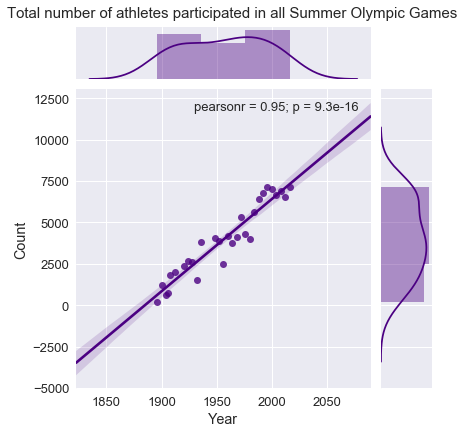

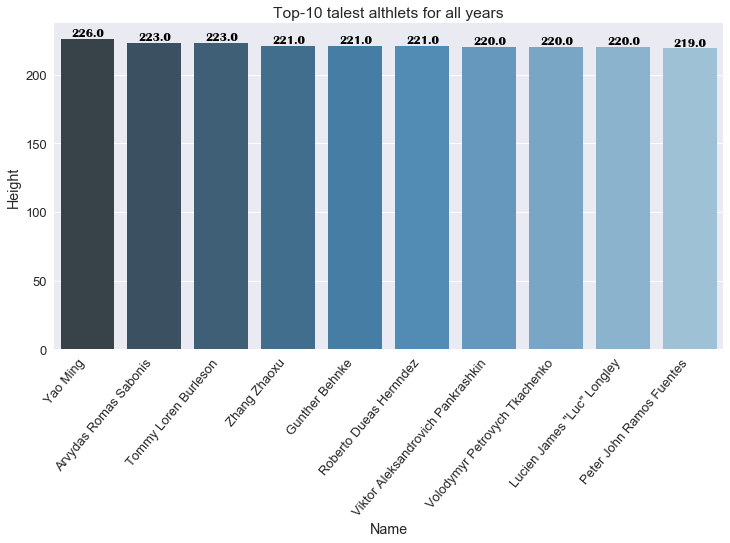

In [5]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# Task: Draw a histogram for total number of athletes participated in all Summer Olympic Games. 
# Think of a way to nicely visualize the all years of Summer Olympics! 
#########################begin code for Task
summur_wo_duplicate=df_olympics.drop_duplicates('Name')
athletes_group=(summur_wo_duplicate.loc[summur_wo_duplicate['Season']=='Summer']).groupby(['Year']).size().to_frame('Count').reset_index().sort_values(['Count'], ascending=[False])

#display the data using joint plot
athletes_fig=sns.jointplot(x='Year',y='Count',data=athletes_group, kind='reg',color='indigo')
plt.suptitle('Total number of athletes participated in all Summer Olympic Games', y=1.01, fontsize=15)
plt.show()
#########################end code for Task


# Task: Draw a "vertical" bar chart that lists the top-10 talest althlets for all years.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task
plt.figure(figsize=(12,6)) # this creates a figure 10 inch wide, 6 inch high

talest_group = df_olympics.groupby(['Name','ID','Height'])
talest_athlets=talest_group.count().reset_index().sort_values(by=['Height'],ascending=False).head(10)

#display the data using barplot
ax_talest=sns.barplot(x='Name',y='Height',data=talest_athlets,palette='Blues_d')
ax_talest.set_xticklabels(ax_talest.get_xticklabels(), rotation=50, ha="right")
#display values above bars
for i in ax_talest.patches:
    ax_talest.text(i.get_x()+.16, i.get_height()+2, \
            str(i.get_height()), fontsize=12,
                color='black',fontname='Britannic Bold')
    
plt.title("Top-10 talest althlets for all years")
plt.show()
#########################end code for Task

# Task 4: 
Find out an 'interesting' information from your Olympic History dataset. Create a visualization for it and explain in a few lines your reasoning. 

<strong>Prediction:</strong> Soviet Union has highest winning ratio

<strong>Definition of winning ratio:</strong> It's the percentage of winning participant from total participant for particular country

<strong>Explanation:</strong> From this ratio we can find that from any 'xyz' team n participants got medal from k participants.
Suppose for upcoming olympic, from soviet union there are k number of participants,
so from the below graph, number of medals n = 44%k.

<strong>Additional Information: </strong> In addition to above information, I have also displayed splitting of all three medals for top 10 countries.

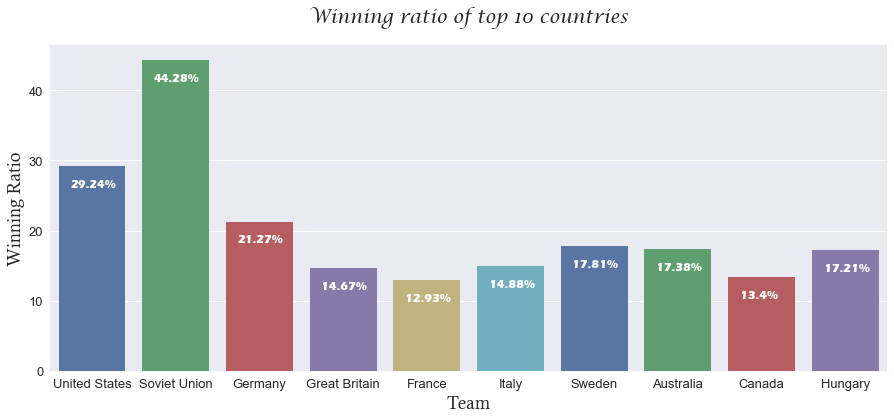

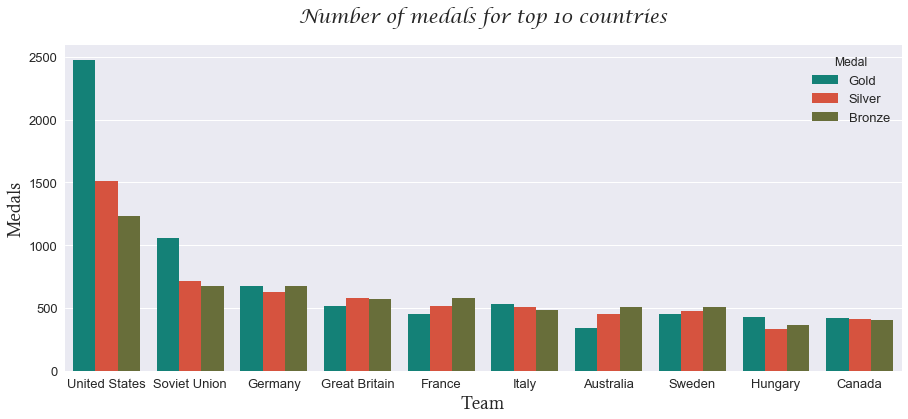

In [6]:
#########################begin code for Task 4

#drop NA value from medal
part_wo_na = df_olympics[df_olympics.Medal.notnull()]

#modify the dataframe according to requiremet
team_data = df_olympics.groupby('Team').size().to_frame('Count').reset_index().sort_values(['Count'], ascending=[False])
team_medal = part_wo_na.groupby('Team').size().to_frame('Medal_Count').reset_index().sort_values(['Medal_Count'], ascending=[False])
medal_count = pd.merge(team_medal,team_data,on=['Team'])

medal_data = df_olympics.groupby((['Team','Medal'])).size().to_frame('Count').reset_index().sort_values(['Count'], ascending=[False])
marge_data = pd.merge(medal_data,team_data,on=['Team'])
no_medals=marge_data[marge_data['Team'].isin(medal_count.Team.head(10))]

#calculate winning ratio and assign these values to new 'Result' column
medal_count['Result'] = ((medal_count['Medal_Count']/medal_count['Count'])*100)

#Diplay first figure
plt.figure(figsize=(15,6))
ax_ratio = sns.barplot(x='Team',y='Result',data=medal_count.head(10),ci=None,palette='deep')

#set labels and title
ax_ratio.set_xlabel("Team", fontname="Calisto MT", fontsize=18)
ax_ratio.set_ylabel("Winning Ratio", fontname="Calisto MT", fontsize=18)
ax_ratio.set_title("Winning ratio of top 10 countries", y=1.05, fontname='Lucida Calligraphy', fontsize=18)

#display values above bars
for i in ax_ratio.patches:
    ax_ratio.text(i.get_x()+.14, i.get_height()-3, \
            str(round(i.get_height(),2))+'%', fontsize=12,
                color='white',fontname='Eras Bold ITC')
plt.show()


#Display second figure
plt.figure(figsize=(15,6))
colors = ["teal", "tomato", "olive drab"]
ax_medals = sns.barplot(x='Team' ,y='Count_x',data=no_medals,ci=None,palette=sns.xkcd_palette(colors),hue='Medal')

#set labels and title
ax_medals.set_xlabel("Team", fontname="Calisto MT", fontsize=18)
ax_medals.set_ylabel("Medals", fontname="Calisto MT", fontsize=18)
ax_medals.set_title("Number of medals for top 10 countries", y=1.05, fontname='Lucida Calligraphy', fontsize=18)
plt.show()


#########################end code for Task 4

## <strong>References:</strong>
<ol>
    <li>https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08</li>
    <li>http://jose-coto.com/styling-with-seaborn</li>
    <li>https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/</li>


    <li>https://seaborn.pydata.org/index.html</li>
    <li>https://github.com/mwaskom/seaborn</li>
    <li>http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html</li>


    <li>http://pandas.pydata.org/</li>
</ol>
    